In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv('guatedata.csv')
df.head()

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
0,60.0,NaN,1,PREMIUM PLUS,n,45,1,1,2439779,0
1,66.0,NaN,1,ALTA,n,71,8,8,0,0
2,NaN,141.0,1,PREMIUM,n,73,25,25,0,0
3,116.0,NaN,2,NaN,n,7,0,0,0,0
4,50.0,NaN,3,ALTA,n,42,7,7,1969990,0


In [75]:
df.describe()

,vedadc_n,vantig_n,vnline_n,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
count,778.000000,496.000000,926.000000,926.000000,926.000000,926.000000,9.260000e+02,926.000000
mean,53.474293,101.177419,1.958963,26.120950,6.304536,6.304536,1.250424e+06,0.278618
std,24.626632,44.257155,1.384251,25.315148,9.335670,9.335670,2.635760e+06,0.448561
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,40.000000,74.000000,1.000000,9.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,53.000000,110.000000,1.000000,19.000000,2.000000,2.000000,0.000000e+00,0.000000
75%,63.000000,134.000000,2.000000,35.000000,8.000000,8.000000,1.107301e+06,1.000000
max,117.000000,174.000000,7.000000,232.000000,54.000000,54.000000,1.834643e+07,1.000000


# Gráfico de diagnóstico

In [76]:
def diagnostic_plot(df, variable):
    plt.figure(figsize = (16,3))
    
    # Histograma
    plt.subplot(1,3,1)
    sns.distplot(df[variable], bins = 30)
    plt.title('Histograma')
    
    # Grafica Q-Q
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    
    # Grafica de Caja
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Gráfico de Cajas')

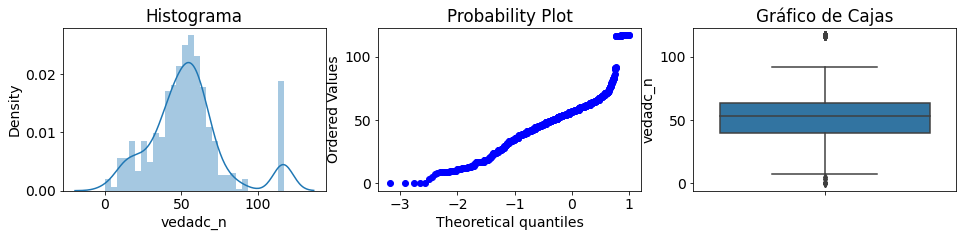

In [77]:
diagnostic_plot(df, 'vedadc_n')

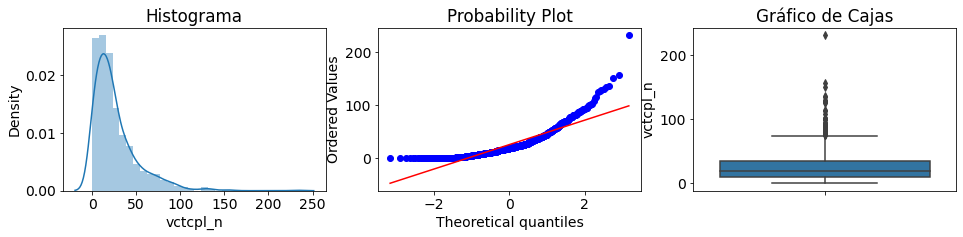

In [78]:
diagnostic_plot(df, 'vctcpl_n')

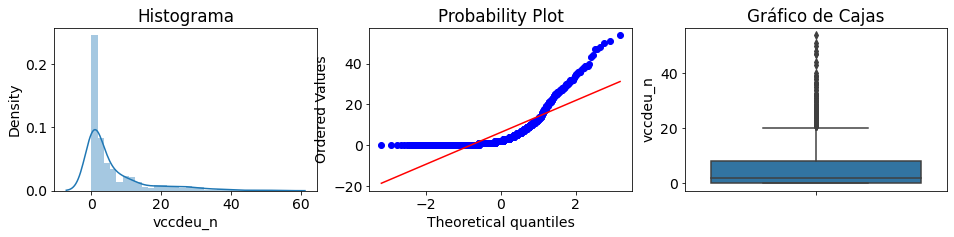

In [79]:
diagnostic_plot(df, 'vccdeu_n')

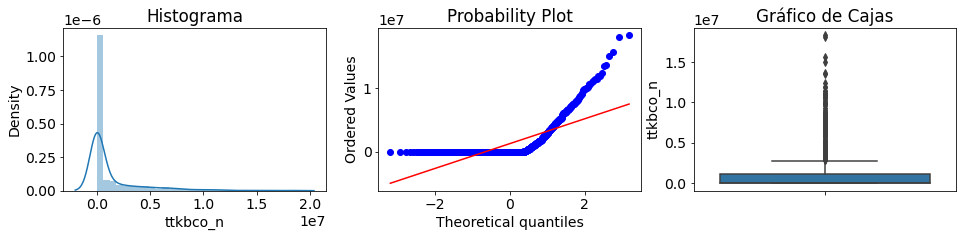

In [80]:
diagnostic_plot(df, 'ttkbco_n')

Función distancia entre cuartiles

In [81]:
def dist_inter_cuartil(df, variable, distancia):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    limite_inf = df[variable].quantile(0.50) - (IQR * distancia)
    limite_sup = df[variable].quantile(0.75) + (IQR * distancia)
    return limite_sup, limite_inf

Encontramos los límites para la variable "vedadc_n" (edad de los clientes)

In [82]:
# Encontremos los límites superior e inferior para la variable 'vedadc_n' 
# (edad de los clientes)

age_limite_sup, age_limite_inf = dist_inter_cuartil( df ,'vedadc_n' , 1.5)
age_limite_sup, age_limite_inf

(97.5, 18.5)

Reemplazamos los valores extremos

In [83]:
# Reemplazando los valores extremos de la variabe 'vedadc_n' por 
# los límites máximos y mínimos

df['vedadc_n'] = np.where(df['vedadc_n'] > age_limite_sup, age_limite_sup,
                 np.where(df['vedadc_n'] < age_limite_inf, age_limite_inf, df['vedadc_n']))

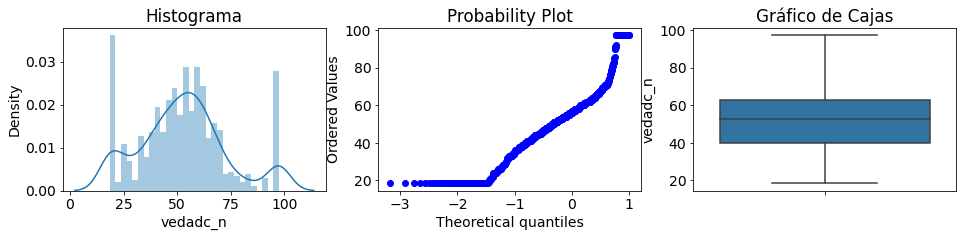

In [84]:
# Observando las gráficas sin outliers de la variable edad 
diagnostic_plot(df, 'vedadc_n')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vedadc_n    778 non-null    float64
 1   vantig_n    496 non-null    float64
 2   vnline_n    926 non-null    int64  
 3   vgamma_c    734 non-null    object 
 4   veaseg_c    926 non-null    object 
 5   vctcpl_n    926 non-null    int64  
 6   vccdeu_n    926 non-null    int64  
 7   vccdeu_n.1  926 non-null    int64  
 8   ttkbco_n    926 non-null    int64  
 9   vtarge_c    926 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 72.5+ KB


In [86]:
# Eliminando las variables "vantig_n" por exceso de valores nulos 
del df['vantig_n']

In [87]:
# Existen valores nulos en la variable Numérica:   "vedadc_n"
# Existen valores nulos en la variable Categórica: "vgamma_c"
df.isnull().sum()

vedadc_n      148
vnline_n        0
vgamma_c      192
veaseg_c        0
vctcpl_n        0
vccdeu_n        0
vccdeu_n.1      0
ttkbco_n        0
vtarge_c        0
dtype: int64

# Imputando valores faltantes con el Método Simple. Imputer

In [88]:
from sklearn.impute import SimpleImputer
# Imputador iterativo - Imputación Univariado Numérica
imp_univ_num = SimpleImputer(missing_values = np.nan, strategy='median')
# Imputador iterativo - Imputación Univariado Categórico
imp_univ_cat = SimpleImputer(missing_values = np.nan,strategy='most_frequent')

df_impt_num = df[['vedadc_n']]
df_impt_cat = df[['vgamma_c']]
# Realizamos la imputación univariada V.Numéricas
imp_univ_num.fit(df_impt_num)
imputed_data_num = pd.DataFrame(data = imp_univ_num.transform(df_impt_num),
                columns = df_impt_num.columns, dtype ='float')
# Realizamos la imputación univariada V.Categóricas
imp_univ_cat.fit(df_impt_cat)
imputed_data_cat = pd.DataFrame(data = imp_univ_cat.transform(df_impt_cat),
                columns = df_impt_cat.columns, dtype ='object')

In [89]:
# Eliminando varibles para luego reemplazarlas por
# las nuevas variables imputadas
del df['vedadc_n']
del df['vgamma_c']

In [90]:
# Agregando columnas al DataFrame
df['vedadc_n'] = imputed_data_num.copy()
df['vgamma_c'] = imputed_data_cat.copy()

In [91]:
# Observando las columnas agregadas imputadas
df.head(3)

,vnline_n,veaseg_c,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c,vedadc_n,vgamma_c
0,1,n,45,1,1,2439779,0,60.0,PREMIUM PLUS
1,1,n,71,8,8,0,0,66.0,ALTA
2,1,n,73,25,25,0,0,53.0,PREMIUM


In [92]:
# Comprobando que no existen valores nulos
df.isnull().sum()

vnline_n      0
veaseg_c      0
vctcpl_n      0
vccdeu_n      0
vccdeu_n.1    0
ttkbco_n      0
vtarge_c      0
vedadc_n      0
vgamma_c      0
dtype: int64

# Transformando variables categóricas en numéricas

In [93]:
# Observando valores diferentes en las variables
print(df['veaseg_c'].unique())
print(df['vgamma_c'].unique())

['n' 's' 'no']
['PREMIUM PLUS' 'ALTA' 'PREMIUM' 'PRIMIUM PLUS' 'BAJA' 'MEDIA'
 'PREMIUN PLUS' 'ALTAa' 'MEDIIA']


In [94]:
# Se observan valores inconsistentes
df['vgamma_c'].value_counts() 

PREMIUM PLUS    567
PREMIUM         214
ALTA             91
BAJA             29
MEDIA            21
PRIMIUM PLUS      1
PREMIUN PLUS      1
ALTAa             1
MEDIIA            1
Name: vgamma_c, dtype: int64

In [95]:
# Reemplazando valores inconsistentes
df['vgamma_c'] = df['vgamma_c'].replace(['PRIMIUM PLUS','PREMIUN PLUS','ALTAa','MEDIIA'],
                                        ['PREMIUM PLUS','PREMIUM PLUS','ALTA','MEDIA'])

In [96]:
# Valores corregidos
df['vgamma_c'].value_counts() 

PREMIUM PLUS    569
PREMIUM         214
ALTA             92
BAJA             29
MEDIA            22
Name: vgamma_c, dtype: int64

In [97]:
# Reemplazando los "nan" por la variable más frecuente (moda)
df['vgamma_c'] = df['vgamma_c'].fillna('PREMIUM PLUS')

In [98]:
# Observando valores diferentes en las variables categóricas
print(df['veaseg_c'].unique())
print(df['vgamma_c'].unique())

['n' 's' 'no']
['PREMIUM PLUS' 'ALTA' 'PREMIUM' 'BAJA' 'MEDIA']


In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['veaseg_c'] = le.fit_transform(df.veaseg_c.values)
df['vgamma_c'] = le.fit_transform(df.vgamma_c.values)

In [100]:
""" Para la variable "veaseg_c":
    n  = 0
    s  = 2
    no = 1

    Para la variable "vgamma_c":
    PREMIUM PLUS = 4
    ALTA         = 0
    PREMIUM      = 3
    BAJA         = 1
    MEDIA        = 2
"""
print(df['veaseg_c'].unique())
print(df['vgamma_c'].unique())

[0 2 1]
[4 0 3 1 2]


# Matriz de Correlación

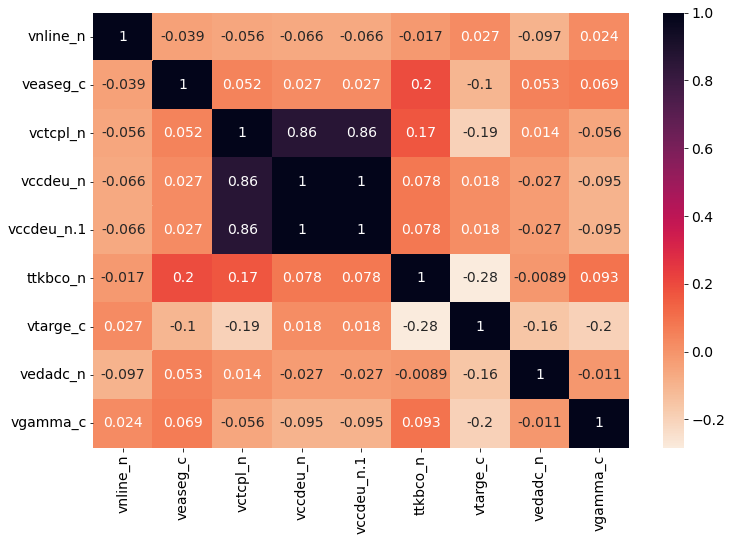

In [101]:
plt.rcParams['figure.figsize']= 12,8  
plt.rcParams['font.size'] = 14

df_small = df.iloc[:,:12]
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=sns.color_palette("rocket_r",as_cmap=True)) 
plt.show()

In [102]:
# Eliminando las variables "vccdeu_n.1", "vctcpl_n" por colinealidad
del df['vccdeu_n.1']
del df['vctcpl_n']

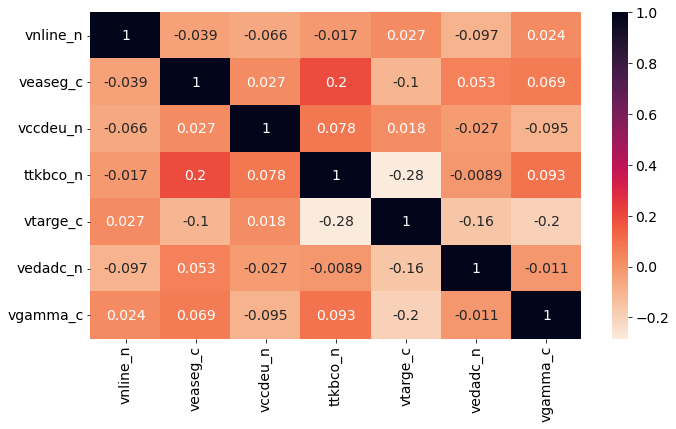

In [103]:
# Ya no existen variables con fuerte colinealidad
plt.rcParams['figure.figsize']= 11,6 
plt.rcParams['font.size'] = 14

df_small = df.iloc[:,:12]
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=sns.color_palette("rocket_r",as_cmap=True)) 
plt.show()

# Balanceo por el método SMOTE

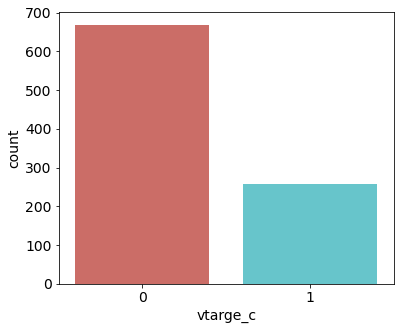

In [104]:
# Observando los datos sin balancear
plt.figure(figsize=(6,5))
sns.countplot(x='vtarge_c', data = df, palette = 'hls')
plt.show()

In [105]:
# Separando la variables predictoras y la variable predictiva 
df_X = df.drop(['vtarge_c'], axis=1)
df_y = df['vtarge_c']
df_X.head()

,vnline_n,veaseg_c,vccdeu_n,ttkbco_n,vedadc_n,vgamma_c
0,1,0,1,2439779,60.0,4
1,1,0,8,0,66.0,0
2,1,0,25,0,53.0,3
3,2,0,0,0,97.5,4
4,3,0,7,1969990,50.0,0


In [106]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 100)
X_sm, y_sm = smote.fit_resample(df_X, df_y)

In [107]:
# Concatenando la información
df_balanceada = pd.concat([X_sm, y_sm], axis = 1)

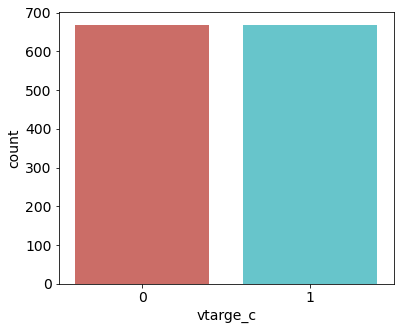

In [108]:
# Observando los datos balanceados
plt.figure(figsize=(6,5))
sns.countplot(x='vtarge_c', data = df_balanceada, palette = 'hls')
plt.show()

In [109]:
# Nueva cantidad de datos al ser balanceados
df_balanceada.vtarge_c.value_counts()

0    668
1    668
Name: vtarge_c, dtype: int64

In [110]:
# Separando la variables predictoras y la variable predictiva 
X = df_balanceada.drop(['vtarge_c'], axis=1)
y = df_balanceada['vtarge_c']

# Estandarizando variables

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
X_scaler = pd.DataFrame(X_scaler)
X_scaler.columns = X.columns

In [112]:
X1 = X_scaler.copy()
y1 = y.copy()
X1.shape, y1.shape

((1336, 6), (1336,))

In [113]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 100)
forest.fit(X1, y1)

RandomForestClassifier(random_state=100)

In [114]:
# Selección de variables importantes por XG Boost
forest.feature_importances_

array([0.07592106, 0.00751481, 0.17801759, 0.26272547, 0.3744681 ,
       0.10135296])

In [115]:
# Creando tabla de Importancia de Variables
TablaImportancia = pd.concat([pd.DataFrame({'Features': list(X1)}),
                              pd.DataFrame({'Importancia': list(forest.feature_importances_)})], axis = 1)
ImportVariables = TablaImportancia[['Features','Importancia']].sort_values('Importancia',ascending=False).reset_index(drop=True)
ImportVariables

,Features,Importancia
0,vedadc_n,0.374468
1,ttkbco_n,0.262725
2,vccdeu_n,0.178018
3,vgamma_c,0.101353
4,vnline_n,0.075921
5,veaseg_c,0.007515


In [116]:
# Partición de Datos: Train, Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, stratify = y1,
                                                    test_size = 0.3, random_state = 100)

In [117]:
# Cantidad de datos de entrenamiento 
X_train.shape, y_train.shape

((935, 6), (935,))

# Cross Validation

In [118]:
from sklearn.model_selection import GridSearchCV
# Definiendo parámetros a probar
parameters = {'max_depth': list(range(2, 15)), 
              'min_samples_split': list(range(2, 10)),   
              'max_features': list(range(3, 8)),
              'min_samples_leaf': list(range(1, 10))}        

In [119]:
# Definiendo el modelo
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 100)

In [120]:
# Ejecutando Grid Search
import time
inicio = time.time()

GridSearch = GridSearchCV(dtree, parameters,
                          cv = 5,
                          n_jobs = -1,
                          scoring  = 'accuracy',
                          refit = True ,
                          return_train_score = True)

GridSearch.fit(X_train, y_train.ravel())

fin = time.time()
print('El tiempo de ejecución es: ', (fin-inicio), 'segundos') 

El tiempo de ejecución es:  131.1185028553009 segundos


In [121]:
# Mejores parámetros:
print('Los mejores parámetros son :', GridSearch.best_params_)
print('Con el mejor auc : ', GridSearch.best_score_)

Los mejores parámetros son : {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Con el mejor auc :  0.8117647058823529


# Entrenando el modelo Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, 
                            max_depth = 7,
                            criterion = 'gini', 
                            min_samples_leaf = 1,   # número mínimo de muestras requeridas para un nodo hoja válido
                            min_samples_split = 10,  # número mínimo de muestras requeridas para dividir un nodo hoja
                            max_features = 5,
                            bootstrap = True,       # muestreo aleatorio
                            oob_score = True,
                            n_jobs = -1,
                            random_state = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=5, min_samples_split=10,
                       n_jobs=-1, oob_score=True, random_state=100)

In [123]:
# Entrenando el algoritmo para validar
y_predict_train = rf.predict(X_train)   # Predicción sobre el train
y_predict_test  = rf.predict(X_test)    # Predicción sobre el test 

In [124]:
from sklearn.metrics import accuracy_score
# Calculando el Accurary 
print('Accuracy Train :', accuracy_score(y_train, y_predict_train))
print('Accuracy Test  :', accuracy_score(y_test, y_predict_test))

Accuracy Train : 0.8652406417112299
Accuracy Test  : 0.8379052369077307


In [125]:
# Calculando la precisión 
from sklearn.metrics import precision_score
print('Precisión train :', precision_score(y_train, y_predict_train))
print('Precisión test  :', precision_score(y_test, y_predict_test))

Precisión train : 0.8190298507462687
Precisión test  : 0.7947598253275109


In [126]:
# Calculando el recall
from sklearn.metrics import recall_score
print('Recall train :', recall_score(y_train, y_predict_train))
print('Recall test  :', recall_score(y_test, y_predict_test))

Recall train : 0.938034188034188
Recall test  : 0.91


Cuadro Comparativo para train:

In [127]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train, y_predict_train)
print(report_train) 

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       467
           1       0.82      0.94      0.87       468

    accuracy                           0.87       935
   macro avg       0.87      0.87      0.86       935
weighted avg       0.87      0.87      0.86       935



Cuadro Comparativo para test:

In [128]:
report_test = classification_report(y_test, y_predict_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       201
           1       0.79      0.91      0.85       200

    accuracy                           0.84       401
   macro avg       0.85      0.84      0.84       401
weighted avg       0.85      0.84      0.84       401



In [129]:
from sklearn.metrics import confusion_matrix
# Matriz de confusión train 
m_confusion_train = confusion_matrix(y_train, y_predict_train)

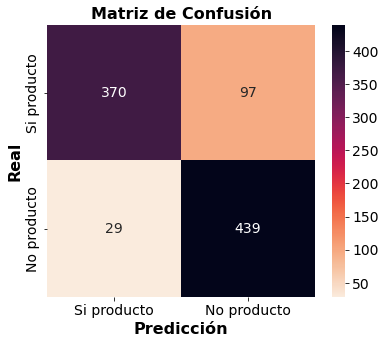

In [130]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_train, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
plt.show()

In [131]:
# Matriz de confusión test 
m_confusion_test = confusion_matrix(y_test, y_predict_test)

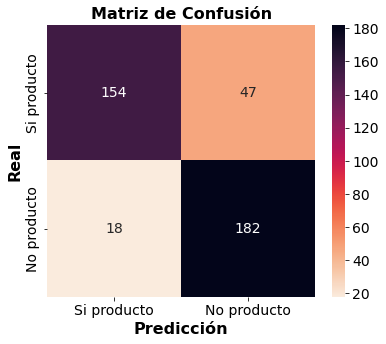

In [132]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_test, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
plt.show()

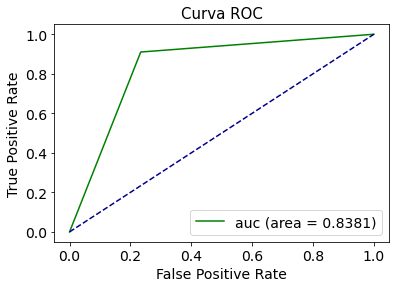

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_predict_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, color = 'green', label = 'auc (area = %0.4f)' % auc) 
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Curva ROC', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend()
plt.show()

In [134]:
# Hacer un archivo pickle de nuestro modelo
import pickle
pickle.dump(rf, open("model.pkl", "wb"))